### Loss function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
y = np.array([0, 1, 0, 0])
yhat1 = np.array([0.1, 0.7, 0.2, 0])
yhat2 = np.array([0.1, 0.2, 0.7, 0])
N = y.size
N

4

- 평균 절대 오차(MAE: Mean Absolute Error)

In [4]:
mae1 = np.sum(np.abs(y - yhat1)) / N
mae2 = np.sum(np.abs(y - yhat2)) / N
print(mae1, mae2)

0.15000000000000002 0.4


- 평균 제곱근 오차(MSE: Mean Squared Error)

In [6]:
mse1 = np.sum(np.square(y - yhat1)) / N
mse2 = np.sum(np.square(y - yhat2)) / N
mse1_copilot = np.sum((y - yhat1)**2) / N
mse2_copilot = np.sum((y - yhat2)**2) / N
print(mse1, mse2, mse1_copilot, mse2_copilot)

0.03500000000000001 0.28500000000000003 0.03500000000000001 0.28500000000000003


- 평균 제곱근 오차(Root Mean Squared Error)

In [8]:
rmse1 = np.sqrt(np.sum(np.square(y - yhat1)) / N)
rmse2 = np.sqrt(np.sum(np.square(y - yhat2)) / N)
rmse1_teacher = np.sqrt(mse1)
rmse2_teacher = np.sqrt(mse2)
print(rmse1, rmse2, rmse1_teacher, rmse2_teacher)

0.18708286933869708 0.5338539126015656 0.18708286933869708 0.5338539126015656


- Categorical Cross Entropy

In [10]:
def cross_entropy_error(y, yhat):
    if yhat.ndim == 1:
        y = y.reshape(1, -1)
        yhat = yhat.reshape(1, -1)
    if yhat.size == y.size:
        y = y.argmax(axis=1)
    batch_size = y.shape[0]
    return -np.sum(np.log(yhat[np.arange(batch_size), y])) / batch_size
    

In [11]:
cce1 = cross_entropy_error(y, yhat1)
cce2 = cross_entropy_error(y, yhat2)
print(cce1, cce2)

0.35667494393873245 1.6094379124341003


- Binary Cross Entropy

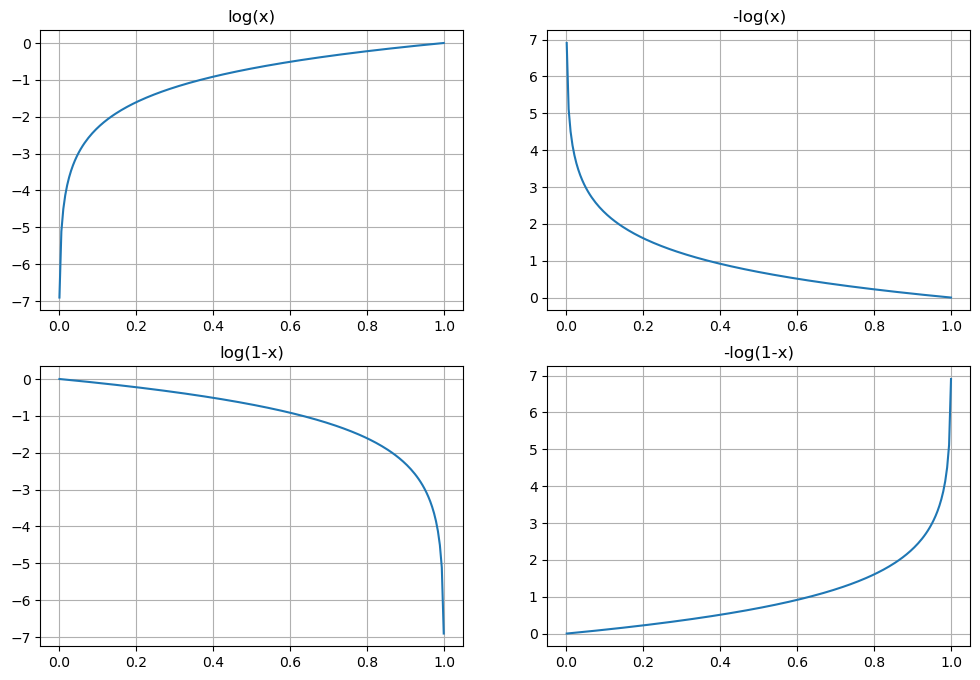

In [13]:
xs = np.linspace(0.001, 0.999, 200)
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.plot(xs, np.log(xs)), plt.title('log(x)'), plt.grid()
plt.subplot(222)
plt.plot(xs, -np.log(xs)), plt.title('-log(x)'), plt.grid()
plt.subplot(223)
plt.plot(xs, np.log(1-xs)), plt.title('log(1-x)'), plt.grid()
plt.subplot(224)
plt.plot(xs, -np.log(1-xs)), plt.title('-log(1-x)'), plt.grid()
plt.show()

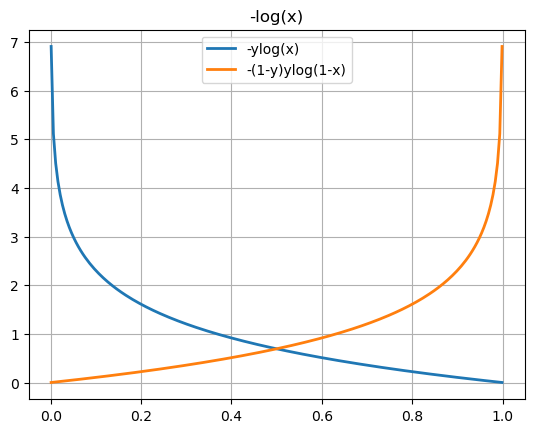

In [14]:
# -ylog(x) - (1-y)log(1-x)
plt.plot(xs, -np.log(xs), lw=2, label='-ylog(x)')
plt.plot(xs, -np.log(1-xs), lw=2, label='-(1-y)ylog(1-x)')
plt.title('-log(x)')
plt.grid(), plt.legend()
plt.show()